## Wrangle and Analyze Data - Udacity Data Analyst Nano Degree Project ##

In this project a dataset from Twitter profile WeRateDogs will be wrangled (gather, assess and clean). All the efforts for this task are going to be reported in this notebook. 

### Name: Daniel Guarino

## Table of Contents

- [Basic Libraries](#libraries)
- [Part I - Gathering Data](#gathering)
- [Part II - Assessing Data](#assess)
- [Part III - Cleaning Data](#regression)


<a id='libraries'></a>
### Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gathering'></a>
### Part I - Gathering Data

**Reading CSV file (manually downloaded from 'Resources' folder on Udacity - Wrangle and Analyze Data web page)**

In [2]:
df = pd.read_csv('twitter_archive/twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Downloading image-predictions.tsv programmatically**

In [4]:
import requests
import os

In [5]:
folder_name = 'twitter_archive'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
with open(os.path.join(folder_name, 
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
os.listdir(folder_name)

['twitter-archive-enhanced.csv',
 'image-predictions.tsv',
 'tweet_json.txt',
 'we_rate_dogs.csv',
 'tweet_json (copy).txt']

In [8]:
df_image = pd.read_csv('twitter_archive/image-predictions.tsv', sep='\t')
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


**Importing and accessing Twitter API (tweep)**

In [9]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [10]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [11]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

In [12]:
# Query Twitter's API for JSON data for each tweet ID in the df dataframe
count = 0
fails_dict = {}
start = timer()
 Save each tweet's returned JSON as a new line in a .txt file
with open('twitter_archive/tweet_json.txt', 'w') as outfile:
#     This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

# Cell output hidden to save lines

In [10]:
# load json file
tweets_list = []

with open('twitter_archive/tweet_json.txt', 'r', encoding='utf8') as json_file:
    for line in json_file:
        tweet_line = json.loads(line)
        tweets_list.append({'tweet_id': tweet_line['id'],
                        'favorites_count': tweet_line['favorite_count'],
                        'retweets_count': tweet_line['retweet_count']})
        

In [11]:
# json file to a Pandas dataframe
df_api = pd.DataFrame(tweets_list)
df_api.head()

,tweet_id,favorites_count,retweets_count
0,892420643555336193,37149,7947
1,892177421306343426,31957,5902
2,891815181378084864,24066,3902
3,891689557279858688,40478,8099
4,891327558926688256,38706,8785


<a id='assess'></a>
### Part II - Assessing Data

### 1. Downloaded data by WeRateDogs page data frame info ###

In [12]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [15]:
# is there any duplicated ID?
sum(df['tweet_id'].duplicated())

0

In [16]:
# normally in WeRateDogs they have rating_numerators bigger or equal than 10 (they're good dogs Brent!)
# it doesn't happen for 440 records
df[df['rating_numerator'] < 10].shape[0]

440

In [17]:
# we also know that the rating denominator value normally is equal to 10
# is there a record with another value?
df[df['rating_denominator'] != 10].shape[0]

23

In [18]:
# are there records where we have a rating numerator smaller than 10 and a rating denominator different than 10
# at the same time?
df[(df['rating_numerator'] < 10) & (df['rating_denominator'] != 10)].shape[0]

6

In [19]:
# the rows in text column has the link to the tweet
df['text'][34]

'This is Maisey. She fell asleep mid-excavation. Happens to the best of us. 13/10 would pat noggin approvingly https://t.co/tp1kQ8i9JF'

In [20]:
# are there records with a very hight rate?
df[df['rating_numerator'] > 20].shape[0]

24

In [21]:
df[df['rating_numerator'] > 20].iloc[:, -7:-5]

,rating_numerator,rating_denominator
188,420,10
189,666,10
290,182,10
313,960,0
340,75,10
433,84,70
516,24,7
695,75,10
763,27,10
902,165,150


In [22]:
# the rate is an allusion to the year of American Independence Year
df['text'][979]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [23]:
# it's the rap singer Snoopy Dog, definetely not an animal!
df['text'][2074]

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

### Quality Issues ###

**1- Completeness:**

- Missing data at `expanded_urls` column
- Missing data at `name` column. Not every dog has a name in this dataset. Since the name was taken from the text, there's nothin we can do about this.
- We pratically don't have data for `in_reply_to_status_id` , `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns. These 05 columns are useless for this dataset.
- We don't need the column `source`. The tweets links are also in each `text` row

**2- Validity:**

- Column `tweet_id` should be a string variable instead integer
- Column `timestamp` should be a datetime variable instead string

**3 - Accuracy:**

- We have 440 records where the rating nominator is smaller than 10. 
- There're also 23 records where the rating denominator is different than 10.
- There're also 6 records where these two situations described above happens at the same time.
- We have 24 records where the rating numerator is higher than 20. 

Let's use the df_image dataset next to try to discover something about these ratings

**These accuracy problems must be scrutinized with more details**


**4- Consistency:**

- This dataset misses a column with the division `rating_numerator` / `rating_denominator`. This column is important in order to allow further statistical analysis


### Tidiness Issues ###

- The `timestamp` column should have separated columns for date and hour. According to one of the tidiness definition each variable day, month, year, etc should form each a column. 
- We should have an unique column for Dog Stages with values like doggo, puppo, pupper, flooter or Nan (not every record has this classification, in this case the values should be a Nan value).

### 2. Downloaded programmatically neural network udacity image dataframe info ###

In [24]:
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [25]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# number of tweets with no image
sum(df_image['img_num'].isnull())

0

In [27]:
# number of tweets with more than 1 image uploaded, not a problem, just checking
sum(df_image['img_num'] > 1)

295

In [28]:
# what's the distribution of the number of images per tweet?
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [29]:
# once again tweet_id is an integer instead a string variable
df_image.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [30]:
# any duplicated tweet?
sum(df_image.duplicated())

0

At df dataframe we have found 2356 entries, at df_images, however, we have found 2075 (minus 281 records). Now we should complement the assesment at df dataframe with df_image. 

In [31]:
# check how many breeds were predicted as a dog breed
sum(df_image['p1_dog'] == True)

1532

In [32]:
# check how many breeds were predicted as not a dog breed. 
sum(df_image['p1_dog'] == False)

543

In [33]:
# just check if the number of entries matches 
assert sum(df_image['p1_dog'] == True) + sum(df_image['p1_dog'] == False) == df_image.shape[0]

In [34]:
# what kind of "breeds" we have when the algorithm didn't predicted a dog?
df_image[df_image['p1_dog'] == False].iloc[:,-9:-6].head(10)

,p1,p1_conf,p1_dog
6,box_turtle,0.933012,False
8,shopping_cart,0.962465,False
17,hen,0.965932,False
18,desktop_computer,0.086502,False
21,three-toed_sloth,0.914671,False
22,ox,0.416669,False
25,guinea_pig,0.996496,False
29,coho,0.404640,False
33,llama,0.505184,False
43,seat_belt,0.375057,False


In [35]:
# which dog breeds do we have?
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_image['p1'].value_counts())

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
German_shepherd                    20
Staffordshire_bullterrier          20
Siberian_husky                     20
web_site                           19
Cardigan                           19
beagle                             18
Shetland_sheepdog                  18
Eskimo_dog                         18
teddy                              18
Maltese_dog                        18
Shih-Tzu                           17
Lakeland_ter

Haven't found different names for the same breed (visually)! we don't have consistency problem with this dataset
we have some breed names starting with capital letters and some with small letters. It can be easlly fixed. These strange breed names are going to be dropped from the dataset further in the cleaning process.

### Quality Issues ###

**1- Completeness:**

- Missing records: in this dataset we have 2075 entries, less than 2356, the number of entries in the downloaded by WeRateDogs dataset (checked above)
  
**2- Validity:**

- We have again the problem with the variable type of the column `tweet_id`. It should be a string instead an integer number. 

**3 - Accuracy:**

- Not every predicted breed is a dog breed (e.g.: llama, guinea_pig). Some predictions are an object, not an animal (e.g.: seat_belt, shopping_cart, desktop_computer). Some of them were due to another animal in the tweet and must be dropped, others were wrongly predicted, but it can be fixed manually.

### Tidiness Issues ###

- We should have an unique breed name in each row, in a single column named `breed` as a variable. So we don't need the others columns (`p2_...` and `p3_...`) we're interested only in the first prediction `p1`. This column must be renamed to `dog_breed` in the cleaning process.

### 3. Tweeter API downloaded Json file dataframe info ###

In [36]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id           2333 non-null int64
favorites_count    2333 non-null int64
retweets_count     2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [37]:
df_api.head()

,tweet_id,favorites_count,retweets_count
0,892420643555336193,37149,7947
1,892177421306343426,31957,5902
2,891815181378084864,24066,3902
3,891689557279858688,40478,8099
4,891327558926688256,38706,8785


In [38]:
# visualize 30 rows randomly sampled
df_api.sample(30)

,tweet_id,favorites_count,retweets_count
459,816062466425819140,0,1083
1954,672988786805112832,979,292
484,813112105746448384,10756,2891
247,843604394117681152,17196,2798
2303,666411507551481857,423,314
1383,699323444782047232,3241,887
1375,699779630832685056,2817,1274
2243,667530908589760512,457,234
842,762471784394268675,11650,6712
1652,682259524040966145,4259,1241


In [39]:
# any duplicated tweet?
sum(df_api.duplicated())

0

### Quality Issues ###

**1- Completeness:**

- Here the only problem is the mismatch in the number of entries. In this dataset we have 2333 entries against 2075 entries in the images data set and 2356 entries in the main dataset.

**2- Validity:**

- We have the same problem with the variable type of the column `tweet_id`. It should be a string instead an integer number.

### Tidiness Issues ###

No tidiness issues in this dataset!

<a id='regression'></a>
### Part III - Cleaning Data

### Copy of the Data Frames ####

In [67]:
df_clean = df.copy()
df_image_clean = df_image.copy()
df_api_clean = df_api.copy()

### Quality Issues Cleaning ###

### Completeness ###

#### 1. Define ####

Remove `in_reply_to_status_id` , `in_reply_to_user_id`, `source`,`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls` columns from df DataFrame using df_clean.drop() Pandas command.

#### Code ####

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [69]:
drop_columns_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source','retweeted_status_id', 
                     'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']

df_clean.drop(columns = drop_columns_list, axis= 1, inplace = True)

#### Test ####

In [70]:
# Should have 10 columns instead 17
assert df_clean.shape[1] == 10

### Validity ###

#### Define ####

Fix Validity problem to df column `timestamp` using pd.to_datetime.

#### Code ####

In [71]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test ####

In [72]:
# ok
df_clean.dtypes 

tweet_id                            int64
timestamp             datetime64[ns, UTC]
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Accuracy ###

#### Define ####

Merge first the df_clean and df_image_clean data datasets, then merge these two with the df_api.
Use pd.merge with the parameter how = 'inner' to keep only what is common for both (left and right datasets)

#### Code ####

In [73]:
df_main_image = pd.merge(df_clean, df_image_clean, on = 'tweet_id', how = 'inner') 

**Test**

In [74]:
df_main_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 21 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null datetime64[ns, UTC]
text                  2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                207

Now we have 2075 entries, those records that didn't match in df and df_image dataframes were discarded.

**Define**

Now merge df_main_image with df_api data frame, once again we're interested in records where images, retweet count and favorite count matches with `tweet_id` of the others columns (`rating_numerator`, `rating_denominator`, etc). For this the parameter how = 'inner' in the pd.merge Pandas method should be used again. 

**Code**

In [75]:
# check if all of the tweet_if from df_api dataframe are contained in the main dataframe
sum(df_api_clean['tweet_id'].isin(df_main_image['tweet_id']) == True)

2061

In [76]:
# merging df_main_image with df_api_clean we have made three dataframes into one: df_twitter
df_twitter = pd.merge(df_main_image, df_api_clean, on = 'tweet_id', how = 'inner')

**Test**

In [77]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 23 columns):
tweet_id              2061 non-null int64
timestamp             2061 non-null datetime64[ns, UTC]
text                  2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
doggo                 2061 non-null object
floofer               2061 non-null object
pupper                2061 non-null object
puppo                 2061 non-null object
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p1_conf               2061 non-null float64
p1_dog                2061 non-null bool
p2                    2061 non-null object
p2_conf               2061 non-null float64
p2_dog                2061 non-null bool
p3                    2061 non-null object
p3_conf               2061 non-null float64
p3_dog                206

Now we have the 2061 entries that have all the information that matches at `tweet_id`, `rating_numerator`, `rating_denominator`, `name`, etc. 

**Define**

Change the variable type to `tweet_id` column using .astype(str)

**Code**

In [78]:
df_twitter['tweet_id'] = df_twitter['tweet_id'].astype(str) 

**Test**

In [79]:
# ok!
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 23 columns):
tweet_id              2061 non-null object
timestamp             2061 non-null datetime64[ns, UTC]
text                  2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
doggo                 2061 non-null object
floofer               2061 non-null object
pupper                2061 non-null object
puppo                 2061 non-null object
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p1_conf               2061 non-null float64
p1_dog                2061 non-null bool
p2                    2061 non-null object
p2_conf               2061 non-null float64
p2_dog                2061 non-null bool
p3                    2061 non-null object
p3_conf               2061 non-null float64
p3_dog                20

**Define**

- Correct manually the records where there are more than one dog in the image
- Drop the records with strange rates 

**Code**

In [80]:
df_twitter[df_twitter['rating_numerator'] > 20].shape[0]

19

In [81]:
df_twitter[df_twitter['rating_numerator'] > 20]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites_count,retweets_count
336,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the flo...,84,70,None,None,None,None,None,...,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,12676,3375
406,810984652412424192,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,5579,1519
548,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None,...,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,19062,6428
603,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,None,...,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,6824,1698
724,758467244762497024,2016-07-28 01:00:57+00:00,Why does this never happen at my front door......,165,150,None,None,None,None,None,...,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,4961,2304
791,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af....,1776,10,Atticus,None,None,None,None,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,5258,2531
913,731156023742988288,2016-05-13 16:15:54+00:00,Say hello to this unbelievably well behaved sq...,204,170,this,None,None,None,None,...,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,3914,1297
990,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None,None,None,None,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,2421,214
1011,713900603437621249,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,None,None,None,None,...,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,2900,755
1036,710658690886586372,2016-03-18 02:46:49+00:00,Here's a brigade of puppers. All look very pre...,80,80,None,None,None,None,None,...,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,2363,572


In [82]:
# drop these records
df_twitter.drop([406, 791, 1783], inplace = True)

In [83]:
# fix manually writing values taken from the text (when the numerator is a decimal number)

In [84]:
df_twitter['text'][548]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [85]:
# present value
df_twitter['rating_numerator'][548]

75

In [86]:
# new numerator value
df_twitter['rating_numerator'][548] = 9.75

/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
df_twitter['text'][603]

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [88]:
# present value
df_twitter['rating_numerator'][603]

27

In [89]:
# new numerator value
df_twitter['rating_numerator'][603] = 11.27

/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
df_twitter['text'][1440]

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [91]:
# present value
df_twitter['rating_numerator'][1440]

26

In [92]:
# new numerator value
df_twitter['rating_numerator'][1440] = 11.26

/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Correct multiples ratings for 13 records, following:

In [93]:
df_twitter[df_twitter['rating_numerator'] > 20].shape[0]

13

In [94]:
index_list = list(df_twitter[df_twitter['rating_numerator'] > 20].index)
len(index_list)

13

For each row where the rating_numerator and rating_denominator is a multiple value because of more than one dog in the image:
- Get the number of dogs in one image dividing the rating_denominator by 10, store this value in the multiple variable. 
- Then divide the present rating_numerator and rating_denominator by the multiple variable and obtain the correct value for each row.

In [95]:
# get the number of dogs in one image using the multiple variable for each case where the rating.
# then
for index in index_list:
    if df_twitter['rating_denominator'][index] != 10:
        multiple = df_twitter['rating_denominator'][index] / 10
        df_twitter['rating_numerator'][index] = df_twitter['rating_numerator'][index] / multiple
        df_twitter['rating_denominator'][index] = df_twitter['rating_denominator'][index] / multiple




/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


**Test**

In [96]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2060
Data columns (total 23 columns):
tweet_id              2058 non-null object
timestamp             2058 non-null datetime64[ns, UTC]
text                  2058 non-null object
rating_numerator      2058 non-null int64
rating_denominator    2058 non-null int64
name                  2058 non-null object
doggo                 2058 non-null object
floofer               2058 non-null object
pupper                2058 non-null object
puppo                 2058 non-null object
jpg_url               2058 non-null object
img_num               2058 non-null int64
p1                    2058 non-null object
p1_conf               2058 non-null float64
p1_dog                2058 non-null bool
p2                    2058 non-null object
p2_conf               2058 non-null float64
p2_dog                2058 non-null bool
p3                    2058 non-null object
p3_conf               2058 non-null float64
p3_dog                20

In [97]:
# corrected rating_numerator
df_twitter['rating_numerator'][548] 

9

In [98]:
# correct rating_numerator
df_twitter['rating_numerator'][603]

11

In [99]:
# correct rating_numerator
df_twitter['rating_numerator'][1440]

11

In [100]:
df_twitter[df_twitter['rating_numerator'] > 20].shape[0]

0

**Define**

Drop all the rows where df_twitter['p1_dog'] = False & df_twitter['rating_numerator' < df_twitter['rating_denominator']]

**Code**

In [101]:
# how many records have the condition explained on "define"
df_twitter[(df_twitter['p1_dog'] == False) & (df_twitter['rating_numerator'] < df_twitter['rating_denominator'])].shape[0]

193

In [102]:
# get index of these records and store in a list
index_list = list(df_twitter[(df_twitter['p1_dog'] == False) & (df_twitter['rating_numerator'] < df_twitter['rating_denominator'])].index)

In [103]:
# drop all of them using the index_list
df_twitter.drop(index = index_list, inplace = True)

**Test**

In [104]:
assert df_twitter[(df_twitter['p1_dog'] == False) & (df_twitter['rating_numerator'] < df_twitter['rating_denominator'])].shape[0] == 0

In [105]:
df_twitter['p1'].value_counts()[:5]

golden_retriever      149
Labrador_retriever     98
Pembroke               88
Chihuahua              81
pug                    57
Name: p1, dtype: int64

**Define**

Correct manually these three rate values taken from the text where the rating_denominator != 10

**Code**

In [106]:
df_twitter[df_twitter['rating_denominator'] != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites_count,retweets_count
865,740373189193256964,2016-06-08 02:41:38+00:00,"After so many requests, this is Bretagne. She ...",9,11,None,None,None,None,None,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,35697,13653
956,722974582966214656,2016-04-21 02:25:47+00:00,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,None,None,None,None,...,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,4187,1591
2040,666287406224695296,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian...,1,2,an,None,None,None,None,...,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,141,63


In [107]:
df_twitter['text'][865]

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [109]:
# present rating_numerator
df_twitter['rating_numerator'][865]

9

In [110]:
# present rating_denominator
df_twitter['rating_denominator'][865]

11

In [111]:
# correct rating_numerator and rating_numerator values from the text
df_twitter['rating_numerator'][865] = 14
df_twitter['rating_denominator'][865] = 10

/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
# wrong values taken from the text
df_twitter['text'][956]

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [113]:
# present rating_numerator value
df_twitter['rating_numerator'][965]

9

In [114]:
# present rating_denominator value
df_twitter['rating_denominator'][956]

20

In [115]:
# correct rating_numerator and rating_numerator values from the text
df_twitter['rating_numerator'][956] = 13
df_twitter['rating_denominator'][956] = 10

/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
df_twitter['text'][2040]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [117]:
# present rating_numerator
df_twitter['rating_numerator'][2040]

1

In [118]:
# present rating_denominator
df_twitter['rating_denominator'][2040]

2

In [119]:
# correct rating_numerator and rating_numerator values from the text
df_twitter['rating_numerator'][2040] = 9
df_twitter['rating_denominator'][2040] = 10

/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/daniel/.pyenv/versions/3.6.0/envs/wrangling_data_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Test**

Check if all the indexes are correctly and assert we don't have any rating_denominator value different than 10.

In [120]:
df_twitter['rating_numerator'][865]

14

In [121]:
df_twitter['rating_denominator'][865]

10

In [122]:
df_twitter['rating_denominator'][956]

10

In [123]:
df_twitter['rating_numerator'][956]

13

In [124]:
df_twitter['rating_denominator'][2040]

10

In [125]:
df_twitter['rating_numerator'][2040]

9

In [126]:
assert df_twitter[df_twitter['rating_denominator'] != 10].shape[0] == 0

In [127]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 2060
Data columns (total 23 columns):
tweet_id              1865 non-null object
timestamp             1865 non-null datetime64[ns, UTC]
text                  1865 non-null object
rating_numerator      1865 non-null int64
rating_denominator    1865 non-null int64
name                  1865 non-null object
doggo                 1865 non-null object
floofer               1865 non-null object
pupper                1865 non-null object
puppo                 1865 non-null object
jpg_url               1865 non-null object
img_num               1865 non-null int64
p1                    1865 non-null object
p1_conf               1865 non-null float64
p1_dog                1865 non-null bool
p2                    1865 non-null object
p2_conf               1865 non-null float64
p2_dog                1865 non-null bool
p3                    1865 non-null object
p3_conf               1865 non-null float64
p3_dog                18

**Define**

Create a new table named dog_rate:
-  df_twitter['dog_rate'] = df_twitter['rating_numerator'] / df_twitter['rating_denominator'] 

**Code**

In [128]:
df_twitter['dog_rate'] = df_twitter['rating_numerator'] / df_twitter['rating_denominator'] 

**Test**

In [129]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 2060
Data columns (total 24 columns):
tweet_id              1865 non-null object
timestamp             1865 non-null datetime64[ns, UTC]
text                  1865 non-null object
rating_numerator      1865 non-null int64
rating_denominator    1865 non-null int64
name                  1865 non-null object
doggo                 1865 non-null object
floofer               1865 non-null object
pupper                1865 non-null object
puppo                 1865 non-null object
jpg_url               1865 non-null object
img_num               1865 non-null int64
p1                    1865 non-null object
p1_conf               1865 non-null float64
p1_dog                1865 non-null bool
p2                    1865 non-null object
p2_conf               1865 non-null float64
p2_dog                1865 non-null bool
p3                    1865 non-null object
p3_conf               1865 non-null float64
p3_dog                18

**Define**

Drop  `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog` columns using df_twitter.drop( col_list, axis =1, inplace = True) and rename the column `p1` to `dog_breed` 

**Code**

In [130]:
col_list = ['p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog']

In [131]:
df_twitter.drop(columns = col_list, axis =1, inplace = True)

In [132]:
df_twitter.rename(columns = {'p1': 'dog_breed'}, inplace = True)

**Test**

In [133]:
df_twitter.shape[1]

16

In [134]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 2060
Data columns (total 16 columns):
tweet_id              1865 non-null object
timestamp             1865 non-null datetime64[ns, UTC]
text                  1865 non-null object
rating_numerator      1865 non-null int64
rating_denominator    1865 non-null int64
name                  1865 non-null object
doggo                 1865 non-null object
floofer               1865 non-null object
pupper                1865 non-null object
puppo                 1865 non-null object
jpg_url               1865 non-null object
img_num               1865 non-null int64
dog_breed             1865 non-null object
favorites_count       1865 non-null int64
retweets_count        1865 non-null int64
dog_rate              1865 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(9)
memory usage: 247.7+ KB


### Tidiness ###

**Define**

Define a new columns named `dog_stages` getting the values from df_twitter['text'] to take each one of these values ('doggo', 'flopper', 'pupper', 'puppo') using string extract method.

#### Code ####

In [135]:
df_twitter['dog_stages'] = df_twitter['text'].str.extract('(doggo|floofer||pupper|puppo)', expand = True)

In [136]:
df_twitter.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

**Test**

In [137]:
df_twitter.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_breed,favorites_count,retweets_count,dog_rate,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,37149,7947,1.3,
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,31957,5902,1.3,


In [138]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 2060
Data columns (total 13 columns):
tweet_id              1865 non-null object
timestamp             1865 non-null datetime64[ns, UTC]
text                  1865 non-null object
rating_numerator      1865 non-null int64
rating_denominator    1865 non-null int64
name                  1865 non-null object
jpg_url               1865 non-null object
img_num               1865 non-null int64
dog_breed             1865 non-null object
favorites_count       1865 non-null int64
retweets_count        1865 non-null int64
dog_rate              1865 non-null float64
dog_stages            1865 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(6)
memory usage: 204.0+ KB


**Define**

Separate date `timestamp` column values into three new columns `year`, `month`, `day`. Then drop `timestamp` column.

**Code**

In [139]:
df_twitter['year'] = df_twitter['timestamp'].dt.year
df_twitter['month'] = df_twitter['timestamp'].dt.month
df_twitter['day'] = df_twitter['timestamp'].dt.day

In [140]:
df_twitter.drop('timestamp', axis = 1, inplace = True)

**Test**

In [141]:
#Should have 15 columns
assert df_twitter.shape[1] == 15

In [142]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 2060
Data columns (total 15 columns):
tweet_id              1865 non-null object
text                  1865 non-null object
rating_numerator      1865 non-null int64
rating_denominator    1865 non-null int64
name                  1865 non-null object
jpg_url               1865 non-null object
img_num               1865 non-null int64
dog_breed             1865 non-null object
favorites_count       1865 non-null int64
retweets_count        1865 non-null int64
dog_rate              1865 non-null float64
dog_stages            1865 non-null object
year                  1865 non-null int64
month                 1865 non-null int64
day                   1865 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 233.1+ KB


### Save to .csv file ###
From this point on, this dataset can be analyzed by others data analysts

In [143]:
df_twitter.to_csv('twitter_archive/we_rate_dogs.csv', index = False)

### Data Insights ###

In this part we're gonna analyze three different variables from twitter dataset 

### 1. Which are the five most common dog breeds? ###

In [146]:
df_twitter['dog_breed'].value_counts()[:5]

golden_retriever      149
Labrador_retriever     98
Pembroke               88
Chihuahua              81
pug                    57
Name: dog_breed, dtype: int64

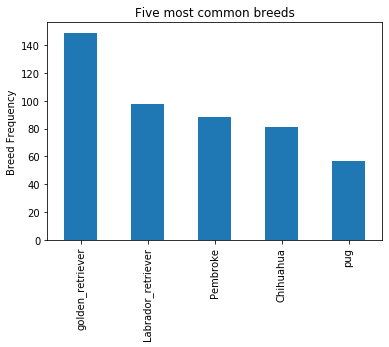

In [201]:
df_twitter['dog_breed'].value_counts()[:5].plot(kind='bar')
plt.title('Five most common breeds')
plt.ylabel('Breed Frequency');

### 2. What is the most retweeted dog? What is it breed? ###

In [196]:
df_twitter['retweets_count'].max()

80337

In [154]:
df_twitter[df_twitter['retweets_count'] == 80337]

,tweet_id,text,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_breed,favorites_count,retweets_count,dog_rate,dog_stages,year,month,day
840,744234799360020481,Here's a doggo realizing you can stand in a po...,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,160593,80337,1.3,,2016,6,18


In [188]:
df_twitter['text'][840]

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

**tweet_id 744234799360020481** a swimming labrador retriever is the champion with 80337 retweets. The video can be seen in this link: https://twitter.com/dog_rates/status/744234799360020481

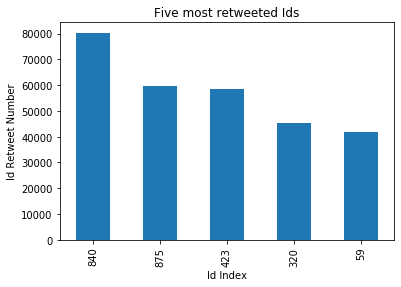

In [200]:
df_twitter['retweets_count'].sort_values(ascending=False)[:5].plot(kind ='bar')
plt.title('Five most retweeted Ids')
plt.xlabel('Id Index')
plt.ylabel('Id Retweet Number');

### 3. What is the ten most common dog names? ###

In [181]:
df_twitter['name'].value_counts()[2:12]

Charlie    10
Tucker     10
Cooper     10
Oliver     10
Penny       9
Lucy        9
Bo          8
Winston     8
Sadie       8
Daisy       7
Name: name, dtype: int64

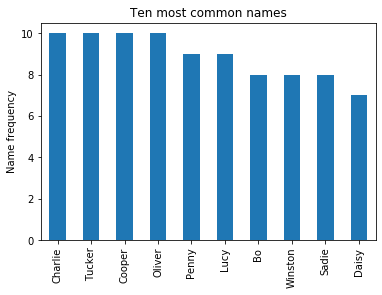

In [187]:
df_twitter['name'].value_counts()[2:12].plot(kind = 'bar')
plt.title('Ten most common names')
plt.ylabel('Name frequency');